In [50]:
import pandas as pd
import numpy as np
import requests
import os
import glob
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# Gather Information

In [51]:
# Gather from csv file
df = pd.read_csv('twitter-archive-enhanced.csv')

In [52]:
# Gather from Udacity's Servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [53]:
image_pred = pd.read_csv("image-predictions.tsv", sep = "\t")

In [54]:
# Gather from Twitter API

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [93]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600


KeyboardInterrupt: 

In [55]:
tweet_total = []
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file:
        tweet_total.append(json.loads(line))

tweet_list = []
for tweet in tweet_total:
    tweet_list.append({'tweet_id': tweet['id'],
                       'retweet_count': tweet['retweet_count'],
                       'favorite_count': tweet['favorite_count']})
df_api = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Assess

In [56]:
df[df.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [58]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [59]:
df[df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [60]:
df[['rating_numerator','text']]

,rating_numerator,text
0,13,This is Phineas. He's a mystical boy. Only eve...
1,13,This is Tilly. She's just checking pup on you....
2,12,This is Archie. He is a rare Norwegian Pouncin...
3,13,This is Darla. She commenced a snooze mid meal...
4,12,This is Franklin. He would like you to stop ca...
5,13,Here we have a majestic great white breaching ...
6,13,Meet Jax. He enjoys ice cream so much he gets ...
7,13,When you watch your owner call another dog a g...
8,13,This is Zoey. She doesn't want to be one of th...
9,14,This is Cassie. She is a college pup. Studying...


In [61]:
df.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

In [62]:
df.duplicated().sum()

0

In [63]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
df.name.value_counts().head(10)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Name: name, dtype: int64

In [65]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [66]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
image_pred[image_pred.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [69]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [70]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [71]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Issues
#### Quality
*df table*
- Contains retweets, that are not required to this analysis
- Contains replies, that are not required to this analysis
- Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have a lot of missing values and will not be required because retweets are not being used.
- Column source should be Category: Twitter for iPhone, Vine, Twitter Web Client, TweetDeck
- 745 dogs have None as a name, 55 dogs have 'a' as a name
- Review value extracted from text to rating_numerator and rating_denominator
- Column timestamp has +0000 extra
- Column timestamp datatype should be datetime instead of object

*image_pred table*
- Column img_num  is not useful

#### Tidiness
*df table*
- Dog stage variable is in 4 columns, instead of one

*df_api table*
- retweet_count and favorite_count from df_api could be part of df table

*image_pred table*
- Merge p1 column with True values in p1_dog to df_clean

# Clean

In [72]:
df_clean = df.copy()
image_clean = image_pred.copy()
df_api_clean = df_api.copy()

### Issue
- Contains retweets, that are not required to this analysis
- Contains replies, that are not required to this analysis

### Define
Eliminate tweets that are retweets or replies

### Code

In [73]:
# Eliminate retweets from df_clean
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [74]:
# Eliminate replies from df_clean
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

### Test

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue
- Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have a lot of missing values and will not be required because retweets are not being used.

### Define
Use drop to eliminate in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

### Code

In [76]:
# drop 6 columns that are not going to be useful
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue
- Column source should be Category: Twitter for iPhone, Vine, Twitter Web Client, TweetDeck

### Define
Use replace to change the actual values for each source to Twitter for iPhone, Vine, Twitter Web Client, TweetDeck

### Code

In [78]:
# Change values for source
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [79]:
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
new_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']
df_clean.source.replace(source_list, new_list, inplace=True)

### Test

In [80]:
df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
679,789137962068021249,2016-10-20 16:15:26 +0000,Twitter for iPhone,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
133,866720684873056260,2017-05-22 18:21:28 +0000,Twitter for iPhone,He was providing for his family 13/10 how dare...,https://twitter.com/nbcnews/status/86645871888...,13,10,None,None,None,None,None
2251,667806454573760512,2015-11-20 20:47:20 +0000,Twitter for iPhone,This is Filup. He is overcome with joy after f...,https://twitter.com/dog_rates/status/667806454...,10,10,Filup,None,None,None,None
792,773670353721753600,2016-09-07 23:52:41 +0000,Twitter for iPhone,This is Shakespeare. He appears to be maximum ...,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
2165,669367896104181761,2015-11-25 04:11:57 +0000,Twitter for iPhone,This is Chip. Chip's pretending to be choked. ...,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,None,None,None,None
1255,710609963652087808,2016-03-17 23:33:12 +0000,Vine,I've watched this a million times and you prob...,https://vine.co/v/idaTpwH5TgU,12,10,None,None,None,None,None
917,756939218950160384,2016-07-23 19:49:07 +0000,Twitter for iPhone,This is Jax. He is a majestic mountain pupper....,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
1259,710272297844797440,2016-03-17 01:11:26 +0000,Twitter for iPhone,We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,https://twitter.com/dog_rates/status/710272297...,11,10,infuriating,None,None,None,None
733,781308096455073793,2016-09-29 01:42:20 +0000,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
512,811744202451197953,2016-12-22 01:24:33 +0000,Twitter for iPhone,This is Halo. She likes watermelon. 13/10 http...,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None


### Issue
- Column img_num is not useful

### Define
Use drop to eliminate img_num column in image_pred table

### Code

In [81]:
image_clean.drop(['img_num'], axis=1, inplace=True)

### Test

In [82]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Issue
- Review value extracted from text to rating_numerator and rating_denominator

### Define
Use Regular Expressions to extract the rating of each tweet, the ones that contain (number/10). If a number is divided by a number less than 10 it should be replaced by 10 and if it is bigger it should remain the same.

### Code

In [83]:
# Create and compare new columns extracted from text: rating_num, rating_den, name, stage
# For rating, we will extract using regular expressions every number with '/10', such as 15/10
df_clean['rating_numerator_2'] = df_clean['text'].str.extract('(\d+\.\d+/10)', expand=False).str.split('/').str[0]
df_clean.loc[df_clean['rating_denominator'] < 10, 'rating_denominator'] = 10
df_clean.loc[df_clean['rating_denominator'] != 10, 'rating_numerator_2'] = df_clean['rating_numerator']
df_clean.loc[df_clean['rating_numerator_2'].isnull(), 'rating_numerator_2'] = df_clean['rating_numerator']
df_clean['rating_numerator_2'] = df_clean['rating_numerator_2'].astype(float)
df_clean.drop('rating_numerator', axis=1, inplace=True)
df_clean = df_clean.rename(columns = {'rating_numerator_2' : 'rating_numerator'})

### Test

In [84]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,None,None,None,None,12.0
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,None,None,None,None,None,13.0
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,Jax,None,None,None,None,13.0
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,None,None,None,None,None,13.0
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,Zoey,None,None,None,None,13.0
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,Cassie,doggo,None,None,None,14.0


### Issue
- 745 dogs have None as a name, 55 dogs have 'a' as a name. There are also 'the' and 'an'

### Define
Use replace to change every 'a', 'None', 'the' and 'an' name to NaN 

### Code

In [85]:
df_clean.name.replace(['None', 'a', 'the', 'an'], np.nan, inplace=True)

### Test

In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_denominator    2097 non-null int64
name                  1425 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
rating_numerator      2097 non-null float64
dtypes: float64(1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue
- Column timestamp has +0000 extra
- Column timestamp datatype should be datetime instead of object

### Define
Use slice to cut off the last 5 digits of the timestamp values and use to_datetime to change the type from object to datetime

### Code

In [87]:
df_clean.timestamp = df_clean.timestamp.str[:-5].str.strip()

In [88]:
df_clean.timestamp = pd.to_datetime(df_clean['timestamp'])

### Test

In [89]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,None,None,None,None,12.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,10,NaN,None,None,None,None,13.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10,Jax,None,None,None,None,13.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,10,NaN,None,None,None,None,13.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,10,Zoey,None,None,None,None,13.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,Cassie,doggo,None,None,None,14.0


In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_denominator    2097 non-null int64
name                  1425 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
rating_numerator      2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


### Issue
- Dog stage variable is in 4 columns, instead of one

### Define
Check for the original values of the differente dog stages using value_counts. Then melt the 4 columns and use an auxiliar column called undefined in order to erase 'None' ones.

### Code

In [91]:
df_clean.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [92]:
df_clean.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [93]:
df_clean.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [94]:
df_clean.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [95]:
df_clean[df_clean.doggo == 'doggo']

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,Cassie,doggo,None,None,None,14.0
43,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,Yogi,doggo,None,None,None,12.0
99,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,10,NaN,doggo,None,None,None,12.0
108,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,10,Napolean,doggo,None,None,None,12.0
110,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,10,NaN,doggo,None,None,None,14.0
121,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,10,Scout,doggo,None,None,None,12.0
172,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,10,NaN,doggo,None,None,None,13.0
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,10,NaN,doggo,None,None,puppo,13.0
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,10,NaN,doggo,floofer,None,None,11.0
240,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,10,Barney,doggo,None,None,None,13.0


In [96]:
#Undefined will be every tweet that has None in the 4 columns of dog stage and the ones that have more than one dog stage declared
def undefined(row):
    if row['doggo'] == 'None' and row['floofer'] == 'None' and row['pupper'] == 'None' and row['puppo'] == 'None':
        x = 'undefined'
    elif row['doggo'] != 'None' and (row['floofer'] != 'None' or row['pupper'] != 'None' or row['puppo'] != 'None') or (row['pupper'] != 'None' and (row['floofer'] != 'None' or row['doggo'] != 'None' or row['puppo'] != 'None')) or (row['floofer'] != 'None' and (row['pupper'] != 'None' or row['doggo'] != 'None' or row['puppo'] != 'None')) or (row['puppo'] != 'None' and (row['pupper'] != 'None' or row['doggo'] != 'None' or row['floofer'] != 'None')):
        x = 'undefined'        
    else:
        x ='None'
    return x

df_clean['undefined'] = df_clean.apply(undefined, axis=1)

In [97]:
df_clean.loc[df_clean.undefined == 'undefined', ['doggo', 'floofer', 'pupper', 'puppo']] = 'None'

In [98]:
df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                    var_name = 'class', value_name = 'dog_stage')

In [99]:
df_clean = df_clean[df_clean['dog_stage']!= 'None']

In [100]:
df_clean = df_clean.drop('class', axis=1)

In [101]:
df_clean.dog_stage.replace('None', np.nan, inplace=True)

### Test

In [102]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo
39,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo
86,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,NaN,doggo
94,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo
95,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,NaN,doggo
104,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo
143,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,NaN,doggo
192,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo
199,845397057150107648,2017-03-24 22:08:59,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,Mimosa,doggo
237,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo


In [103]:
df_clean.dog_stage.value_counts()

undefined    1772
pupper        221
doggo          72
puppo          23
floofer         9
Name: dog_stage, dtype: int64

In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 9 to 10484
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1425 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 163.8+ KB


### Issue
- retweet_count and favorite_count from df_api could be part of df table

### Define
Use merge to join df_api_clean to df_clean table

### Code

In [105]:
df_clean = pd.merge(df_clean, df_api_clean, on='tweet_id', how='left')

### Test

In [106]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,7711,32467
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,3128,20771
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,NaN,doggo,5669,28031
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,3628,20730
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,NaN,doggo,5764,21461
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,3327,16476
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,NaN,doggo,3771,16304
7,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo,13076,48410
8,845397057150107648,2017-03-24 22:08:59,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,Mimosa,doggo,2072,8241
9,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo,5237,21029


In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1425 non-null object
dog_stage             2097 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 196.6+ KB


### Issue
- Merge p1 column with True values in p1_dog to df_clean

### Define
Use merge to join image_pred (column p1) to df_clean table, but first filter p1_dog = True

### Code

In [108]:
image_clean_2 = image_clean[image_clean.p1_dog == True]
image_clean_2 = image_clean_2.loc[:,['tweet_id', 'p1']]
image_clean_2.rename(columns={'p1': 'dog_breed'}, inplace=True)

In [109]:
df_clean = pd.merge(df_clean, image_clean_2, on = 'tweet_id', how = 'left')

### Test

In [110]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,7711,32467,Pembroke
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,3128,20771,German_shepherd
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,NaN,doggo,5669,28031,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,3628,20730,komondor
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,NaN,doggo,5764,21461,NaN
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,3327,16476,Chihuahua
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,NaN,doggo,3771,16304,golden_retriever
7,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo,13076,48410,golden_retriever
8,845397057150107648,2017-03-24 22:08:59,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,Mimosa,doggo,2072,8241,Dandie_Dinmont
9,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo,5237,21029,NaN


# Store

In [111]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
image_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyze

#### Questions
- Which breed of dog has more likes?
- Which breed of dog has more retweets?
- Which breed of dog has better rating?
- Which dog stage has better rating numerator?
- Which dog is the most popular?

In [112]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,7711,32467,Pembroke
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,3128,20771,German_shepherd
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,NaN,doggo,5669,28031,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,3628,20730,komondor
4,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14.0,10,NaN,doggo,5764,21461,NaN
5,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,3327,16476,Chihuahua
6,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13.0,10,NaN,doggo,3771,16304,golden_retriever
7,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13.0,10,Barney,doggo,13076,48410,golden_retriever
8,845397057150107648,2017-03-24 22:08:59,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10,Mimosa,doggo,2072,8241,Dandie_Dinmont
9,836753516572119041,2017-03-01 01:42:39,Twitter for iPhone,This is Meera. She just heard about taxes and ...,https://twitter.com/dog_rates/status/836753516...,12.0,10,Meera,doggo,5237,21029,NaN


In [113]:
df_clean.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)

dog_breed
Saluki                         24060.000000
French_bulldog                 17913.000000
Afghan_hound                   17326.666667
giant_schnauzer                17314.500000
black-and-tan_coonhound        17012.000000
flat-coated_retriever          16791.625000
Irish_water_spaniel            16400.000000
standard_poodle                15786.000000
English_springer               15657.222222
Cardigan                       15311.000000
Leonberg                       14934.333333
basset                         13866.000000
Border_terrier                 13578.000000
Samoyed                        13574.775000
Lakeland_terrier               13213.200000
Bedlington_terrier             13025.000000
Great_Pyrenees                 12932.000000
Mexican_hairless               12640.500000
Norwegian_elkhound             12363.571429
golden_retriever               12361.131387
Tibetan_mastiff                12173.500000
Eskimo_dog                     12001.555556
Weimaraner            

The breed Saluki is the one that has more likes in Twitter by the users by far, followed by 4 others breeds that have around 17.000 and 18.000 likes, which are French Bulldog, Afghan Hound, Giant Schnauzer and Black and Tan Coonhound.

In [114]:
df_clean.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)

dog_breed
standard_poodle                6631.857143
Afghan_hound                   5976.000000
English_springer               5973.555556
giant_schnauzer                5161.500000
Saluki                         5133.750000
Eskimo_dog                     4768.888889
Great_Pyrenees                 4732.285714
Lakeland_terrier               4701.533333
French_bulldog                 4683.923077
Samoyed                        4623.050000
Cardigan                       4540.588235
flat-coated_retriever          4520.250000
Irish_water_spaniel            4500.666667
Tibetan_mastiff                4193.000000
black-and-tan_coonhound        4164.500000
Labrador_retriever             3884.138298
Mexican_hairless               3865.250000
Leonberg                       3863.666667
cocker_spaniel                 3724.481481
golden_retriever               3658.576642
Norwegian_elkhound             3446.285714
Border_terrier                 3377.142857
Irish_setter                   3374.000000
b

The Standard Poodle is the most retweeted by users with over 6.000, followed by Afghan Hound and English Springer. 

In [115]:
df_clean.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)

dog_breed
soft-coated_wheaten_terrier    26.700000
West_Highland_white_terrier    15.642857
Great_Pyrenees                 14.928571
borzoi                         14.625000
Labrador_retriever             13.936170
Siberian_husky                 13.250000
Saluki                         12.500000
golden_retriever               12.339416
briard                         12.333333
Tibetan_mastiff                12.250000
Border_terrier                 12.142857
standard_schnauzer             12.000000
silky_terrier                  12.000000
Eskimo_dog                     11.777778
Irish_setter                   11.750000
Gordon_setter                  11.750000
Samoyed                        11.700000
chow                           11.609756
Cardigan                       11.529412
giant_schnauzer                11.500000
wire-haired_fox_terrier        11.500000
Australian_terrier             11.500000
kelpie                         11.454545
Pembroke                       11.443182
Greate

The Clumber and the Soft Coated Wheaten Terrier are by far the most rated breed dogs by We Rate Dogs.

In [116]:
df_clean.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending=False)

dog_stage
undefined    12.339453
puppo        12.000000
floofer      11.888889
doggo        11.847222
pupper       10.734253
Name: rating_numerator, dtype: float64

Rating by dog stage is quite similar and is between 10 and 12 points in average.

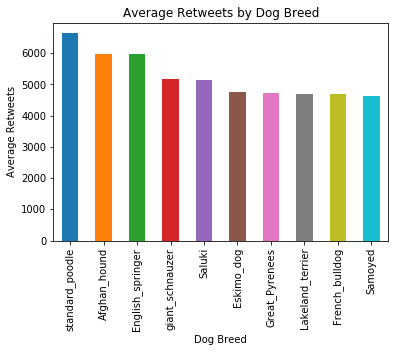

In [117]:
df_clean.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Retweets by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Average Retweets');

The Standard Poodle is the most retweeted by users with over 6.000, followed by Afghan Hound and English Springer.

In [118]:
df_clean.sort_values(by='favorite_count', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
310,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,48265,132810,Lakeland_terrier
62,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,79515,131075,Labrador_retriever
377,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,undefined,45849,107956,English_springer
674,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,undefined,56625,107015,Chihuahua
88,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,pupper,32883,106827,French_bulldog
29,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,doggo,42228,95450,standard_poodle
407,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10,Zoey,undefined,27680,85011,golden_retriever
676,806629075125202948,2016-12-07 22:38:52,Twitter for iPhone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13.0,10,NaN,undefined,37911,75639,NaN
445,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,quite,undefined,25661,75193,NaN
65,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,NaN,doggo,52360,75163,Eskimo_dog


https://twitter.com/dog_rates/status/822872901745569793 this puppy is the most popular dog in the Twitter account

In [119]:
df_clean.sort_values(by='rating_numerator', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
966,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,undefined,2772,5569,NaN
1821,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,undefined,4324,7989,NaN
1069,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,this,undefined,1434,4196,NaN
914,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,NaN,undefined,2539,5316,Labrador_retriever
1585,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144.0,120,NaN,undefined,1104,3323,NaN
1474,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110,NaN,undefined,1563,4225,soft-coated_wheaten_terrier
1158,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90,NaN,undefined,829,3062,golden_retriever
1635,675853064436391936,2015-12-13 01:41:41,Twitter for iPhone,Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,80,NaN,undefined,1460,2927,Labrador_retriever
608,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,NaN,undefined,3716,13518,West_Highland_white_terrier
1180,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,NaN,undefined,636,2529,soft-coated_wheaten_terrier


In [120]:
df_clean[df_clean.dog_breed == 'standard_poodle'].sort_values(by='retweet_count', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
29,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,doggo,42228,95450,standard_poodle
1092,726224900189511680,2016-04-30 01:41:23,Twitter for iPhone,I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9.0,10,NaN,undefined,1302,4811,standard_poodle
893,761292947749015552,2016-08-04 20:09:17,Twitter for iPhone,Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11.0,10,Bonaparte,undefined,1265,4957,standard_poodle
964,750026558547456000,2016-07-04 18:00:41,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,10.0,10,Jax,undefined,888,2986,standard_poodle
1405,689999384604450816,2016-01-21 02:34:07,Twitter for iPhone,This is Covach. He's trying to melt the snow. ...,https://twitter.com/dog_rates/status/689999384...,10.0,10,Covach,undefined,424,1561,standard_poodle
1964,668484198282485761,2015-11-22 17:40:27,Twitter for iPhone,Good teamwork between these dogs. One is on lo...,https://twitter.com/dog_rates/status/668484198...,9.0,10,NaN,undefined,253,453,standard_poodle
1936,668932921458302977,2015-11-23 23:23:31,Twitter for iPhone,This is Herald. He likes to swing. Subtle tong...,https://twitter.com/dog_rates/status/668932921...,9.0,10,Herald,undefined,63,284,standard_poodle


In [121]:
df_clean.sort_values(by='retweet_count', ascending=False)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
62,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,79515,131075,Labrador_retriever
674,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,undefined,56625,107015,Chihuahua
65,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10,NaN,doggo,52360,75163,Eskimo_dog
310,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,48265,132810,Lakeland_terrier
377,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,undefined,45849,107956,English_springer
29,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,doggo,42228,95450,standard_poodle
676,806629075125202948,2016-12-07 22:38:52,Twitter for iPhone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13.0,10,NaN,undefined,37911,75639,NaN
890,761672994376806400,2016-08-05 21:19:27,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10.0,10,NaN,undefined,33421,55016,NaN
88,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10,Jamesy,pupper,32883,106827,French_bulldog
1624,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10.0,10,Kenneth,undefined,31989,67100,NaN
